# Load and merge the data

In [17]:
#load the data in pandas
import pandas as pd
ids = pd.read_csv('labels.tsv', sep='\t', header=None, names=["comicID"])
display(ids.head())

labels=[]
for i in range (300):
    labels.append(str(i))

vectors = pd.read_csv('vectors.tsv', sep='\t', header=None, names=labels)
display(vectors.head())

df = pd.merge(ids, vectors, left_index=True, right_index=True, how='inner')
display(df.head())

,comicID
0,1
1,2
2,3
3,4
4,5


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.069718,0.066964,-0.130896,-0.080547,0.175329,-0.101839,-0.106166,-0.088391,-0.034256,1.932268,...,-0.133808,0.003419,0.017099,-0.138358,-0.074387,0.053000,-0.134366,-0.010335,-0.104221,0.154901
1,0.029285,0.050454,-0.199647,-0.156741,0.163137,-0.045763,-0.045990,0.017132,-0.137263,1.992399,...,-0.209659,-0.021645,-0.015773,-0.105944,-0.234159,0.198810,0.016666,-0.108885,0.053425,0.154739
2,-0.026440,0.049482,0.062152,-0.176324,0.071269,0.046273,-0.070729,-0.068774,-0.238235,1.634626,...,-0.171691,0.041493,-0.106501,-0.054373,-0.163593,0.074602,-0.070697,-0.012147,-0.191379,0.117312
3,0.029260,0.075511,-0.111601,-0.075924,0.064649,0.023453,-0.044396,0.015476,-0.106102,1.766938,...,-0.141378,-0.010017,0.034662,-0.079466,-0.115493,0.060575,-0.008318,-0.005819,-0.099957,0.166309
4,0.008364,0.156287,-0.016608,0.017144,0.152242,-0.050582,-0.097484,-0.111673,-0.022608,1.884922,...,-0.192534,0.042538,0.053012,-0.068746,-0.137729,0.030523,-0.026311,-0.044249,-0.007654,0.108880


,comicID,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,0.069718,0.066964,-0.130896,-0.080547,0.175329,-0.101839,-0.106166,-0.088391,-0.034256,...,-0.133808,0.003419,0.017099,-0.138358,-0.074387,0.053000,-0.134366,-0.010335,-0.104221,0.154901
1,2,0.029285,0.050454,-0.199647,-0.156741,0.163137,-0.045763,-0.045990,0.017132,-0.137263,...,-0.209659,-0.021645,-0.015773,-0.105944,-0.234159,0.198810,0.016666,-0.108885,0.053425,0.154739
2,3,-0.026440,0.049482,0.062152,-0.176324,0.071269,0.046273,-0.070729,-0.068774,-0.238235,...,-0.171691,0.041493,-0.106501,-0.054373,-0.163593,0.074602,-0.070697,-0.012147,-0.191379,0.117312
3,4,0.029260,0.075511,-0.111601,-0.075924,0.064649,0.023453,-0.044396,0.015476,-0.106102,...,-0.141378,-0.010017,0.034662,-0.079466,-0.115493,0.060575,-0.008318,-0.005819,-0.099957,0.166309
4,5,0.008364,0.156287,-0.016608,0.017144,0.152242,-0.050582,-0.097484,-0.111673,-0.022608,...,-0.192534,0.042538,0.053012,-0.068746,-0.137729,0.030523,-0.026311,-0.044249,-0.007654,0.108880


# t-SNE 2D

In [101]:
#apply t-SNE
from sklearn.manifold import TSNE

tsne2D = TSNE(n_components=2, verbose=1, perplexity=12, learning_rate=1.0, n_iter=10000)
tsne_results2D = tsne2D.fit_transform(df.loc[:, df.columns != 'comicID'])
print("Done t-SNE")


[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 2015 samples in 0.042s...
[t-SNE] Computed neighbors for 2015 samples in 2.559s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2015
[t-SNE] Computed conditional probabilities for sample 2000 / 2015
[t-SNE] Computed conditional probabilities for sample 2015 / 2015
[t-SNE] Mean sigma: 0.181912
[t-SNE] KL divergence after 100 iterations with early exaggeration: 84.939392
[t-SNE] Error after 10000 iterations: 2.324233
Done t-SNE


In [81]:
print(tsne_results2D.shape)

(2015, 2)


In [102]:
df_tsne2D = df[["comicID"]].copy()
df_tsne2D['x1'] = tsne_results2D[:,0]
df_tsne2D['x2'] = tsne_results2D[:,1]

df_tsne2D.to_csv("tSNE_xkcd_noDates.csv")
df_tsne2D.head()

,comicID,x1,x2
0,1,41.812622,37.173950
1,2,2.869712,36.489292
2,3,-15.579906,53.101219
3,4,-11.317410,38.462097
4,5,8.379328,34.065613


In [89]:
# df_tsne2D= df_tsne2D.from_csv('tSNE_xkcd_noDates.csv')
print(df_tsne2D.shape)
df_tsne2D.head()

(2015, 4)


,comicID,x1,x2,gmmCluster
0,1,30.254152,23.367542,6
1,2,25.375990,-8.192231,9
2,3,19.545204,-7.071005,5
3,4,19.161390,-6.834197,5
4,5,20.451082,-3.042558,5


In [103]:
from sklearn.mixture import GaussianMixture

clusterCount = 10

#Predict GMM cluster membership
gm_messy = GaussianMixture(n_components=clusterCount).fit(tsne_results2D).predict(tsne_results2D)

#check that the predictions are not stuck in the time domain
for i in range(1000,1300):
    print(gm_messy[i])
    
df_tsne2D['gmmCluster'] = gm_messy

7
5
6
7
1
0
1
6
6
7
3
4
2
4
8
6
1
4
1
8
8
4
4
7
7
8
3
8
9
3
1
7
1
5
4
3
7
9
6
5
4
0
1
7
8
0
5
1
2
0
5
8
0
4
8
1
3
2
7
8
5
9
6
9
7
1
0
6
0
1
9
6
8
6
8
5
4
8
5
9
4
2
8
6
8
5
4
7
0
9
4
3
5
2
8
0
7
1
7
4
3
6
6
3
8
8
5
7
1
9
4
4
4
7
6
5
7
0
8
6
0
3
3
1
9
8
9
6
9
7
1
8
1
4
4
7
6
1
4
5
3
5
8
5
3
0
5
5
2
7
5
8
0
0
0
8
8
3
9
8
5
8
0
8
9
8
5
8
5
0
6
8
3
1
1
6
6
0
5
8
1
6
9
1
5
8
8
5
9
5
6
6
1
8
9
5
1
9
6
8
8
9
2
9
1
6
7
1
6
4
8
6
1
6
3
0
8
6
8
1
3
0
7
1
9
2
8
7
2
9
9
7
7
7
1
4
1
7
7
8
8
1
7
8
8
8
1
6
5
1
8
8
5
0
4
0
4
2
7
4
6
0
6
6
4
1
4
7
7
7
9
3
1
5
5
1
7
8
0
8
1
7
5
6
9
5
3
5
8
6
0
5
7
5
8
5
8
5
1
5


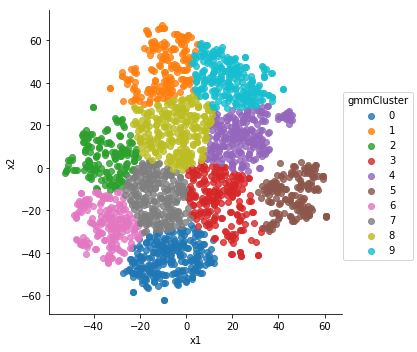

In [104]:
%matplotlib inline
#visualize the 2D data without clusters
import seaborn as sns

jp = sns.lmplot(x='x1', y='x2', hue='gmmCluster', data=df_tsne2D, fit_reg=False)
# jp = sns.jointplot(x='x1', y='x2', data=df_tsne2D, kind='reg', space=0, size=15, ratio=2, hue='comicID')

# 3D t-SNE

In [105]:
#apply t-SNE
from sklearn.manifold import TSNE

tsne3D = TSNE(n_components=3, verbose=1, perplexity=12, learning_rate=1.0, n_iter=10000)
tsne_results3D = tsne3D.fit_transform(df.loc[:, df.columns != 'comicID'])
print("Done t-SNE")

[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 2015 samples in 0.042s...
[t-SNE] Computed neighbors for 2015 samples in 2.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2015
[t-SNE] Computed conditional probabilities for sample 2000 / 2015
[t-SNE] Computed conditional probabilities for sample 2015 / 2015
[t-SNE] Mean sigma: 0.181912
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.164467
[t-SNE] Error after 9600 iterations: 2.025746
Done t-SNE


In [106]:
df_tsne3D = df[["comicID"]].copy()
df_tsne3D['x1'] = tsne_results3D[:,0]
df_tsne3D['x2'] = tsne_results3D[:,1]
df_tsne3D['x3'] = tsne_results3D[:,2]

df_tsne3D.to_csv("tSNE_3D_xkcd_noDates.csv")
df_tsne3D.head()

from sklearn.mixture import GaussianMixture

clusterCount = 10

#Predict GMM cluster membership
gm_messy = GaussianMixture(n_components=clusterCount).fit(tsne_results3D).predict(tsne_results3D)

for i in range(1000,1100):
    print(gm_messy[i])
    
df_tsne3D['gmmCluster'] = gm_messy

4
2
4
5
5
1
7
4
4
8
6
0
8
9
5
4
2
9
5
8
0
4
6
3
4
0
6
0
9
3
5
3
0
2
9
6
4
0
4
2
9
4
7
8
5
3
2
7
5
1
2
5
1
9
8
2
4
5
5
5
2
7
3
7
6
2
1
4
1
2
7
4
5
4
9
2
9
5
2
7
5
4
8
4
5
2
9
3
1
9
0
4
2
8
5
1
8
2
3
6


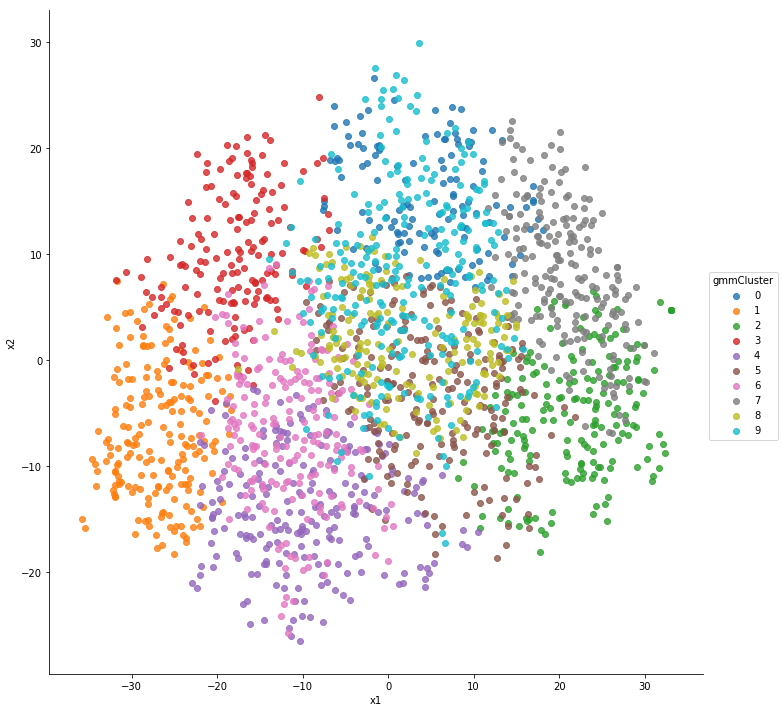

In [107]:
%matplotlib inline
#visualize the 2D data without clusters
import seaborn as sns

jp = sns.lmplot(x='x1', y='x2', hue='gmmCluster', data=df_tsne3D, fit_reg=False, size=10)


Text(0.5,0,'x3')

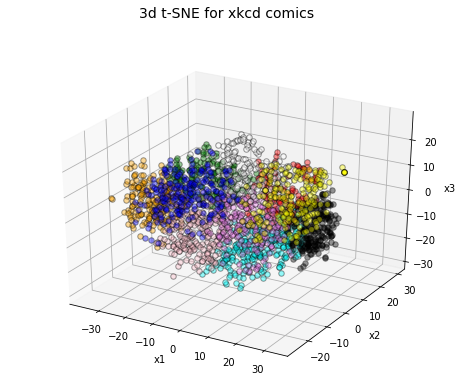

In [108]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('3d t-SNE for xkcd comics', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(df_tsne3D['x1'])
ys = list(df_tsne3D['x2'])
zs = list(df_tsne3D['x3'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

colorList = ["red","orange","yellow","green","blue","violet","pink","black","white","cyan"]

colors = [ colorList[int(wt)] for wt in list(df_tsne3D['gmmCluster'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

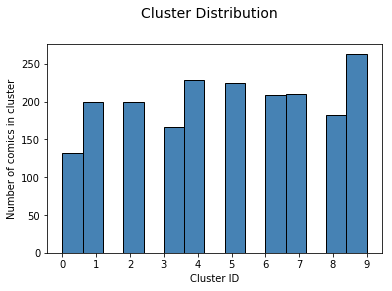

In [109]:
%matplotlib inline
#visualize
import seaborn as sns

fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Cluster Distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Cluster ID")
ax.set_ylabel("Number of comics in cluster") 
# plt.xticks(np.arange(0, 10, step=1.0))
plt.xticks(np.arange(10), ('0','1', '2', '3', '4', '5','6', '7', '8', '9'))
freq, bins, patches = ax.hist(gm_messy, color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

In [111]:
df_tsne2D.head()
df_tsne3D.head()

,comicID,x1,x2,x3,gmmCluster
0,1,6.837961,21.407763,-24.325033,9
1,2,9.906508,21.716639,-5.884641,0
2,3,20.868893,-7.511045,-3.601632,2
3,4,19.002262,-7.025186,-4.433051,5
4,5,20.063015,19.975441,-12.395782,7
